In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
def parse_m4_hourly_dataset(file_path):
    """
    M4 시간별 데이터셋을 파싱하여 딕셔너리 형태로 반환합니다.
    각 키는 시계열 ID이고 값은 (시작시간, 값 리스트) 튜플입니다.
    """
    time_series_dict = {}
    data_started = False
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            
            # @data 태그를 찾아 실제 데이터 시작 부분을 확인
            if line == '@data':
                data_started = True
                continue
            
            if data_started and line:
                # 큰따옴표 제거 (있는 경우)
                if line.startswith('"') and line.endswith('"'):
                    line = line[1:-1]
                
                # ID, 시작시간, 데이터 값을 분리
                parts = line.split(':', 2)
                if len(parts) >= 3:
                    ts_id = parts[0]
                    start_time_str = parts[1]
                    values_str = parts[2]
                    
                    # 시작 시간 파싱
                    try:
                        # 포맷이 'YYYY-MM-DD HH-MM-SS'인 경우
                        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H-%M-%S')
                    except ValueError:
                        try:
                            # 다른 가능한 포맷 시도
                            start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
                        except ValueError:
                            print(f"시작 시간 '{start_time_str}' 파싱 실패, 기본값 사용")
                            start_time = datetime(2015, 1, 1)
                    
                    # 데이터 값 파싱
                    values = []
                    for val in values_str.split(','):
                        try:
                            values.append(float(val.strip()))
                        except ValueError:
                            # 숫자가 아닌 값은 NaN으로 처리
                            values.append(np.nan)
                    
                    time_series_dict[ts_id] = (start_time, values)
    
    return time_series_dict

In [5]:
def check_missing_values(time_series_dict):
    """
    시계열 데이터에서 결측값(NaN)을 확인합니다.
    """
    missing_stats = {
        'total_series': len(time_series_dict),
        'series_with_missing': 0,
        'total_values': 0,
        'total_missing': 0,
        'series_details': []
    }
    
    for ts_id, (start_time, values) in time_series_dict.items():
        total = len(values)
        missing = sum(np.isnan(v) for v in values)
        missing_ratio = missing / total if total > 0 else 0
        
        missing_stats['total_values'] += total
        missing_stats['total_missing'] += missing
        
        if missing > 0:
            missing_stats['series_with_missing'] += 1
            missing_stats['series_details'].append({
                'ts_id': ts_id,
                'total_values': total,
                'missing_values': missing,
                'missing_ratio': missing_ratio
            })
    
    # 전체 결측치 비율 계산
    if missing_stats['total_values'] > 0:
        missing_stats['overall_missing_ratio'] = missing_stats['total_missing'] / missing_stats['total_values']
    else:
        missing_stats['overall_missing_ratio'] = 0
    
    return missing_stats

In [6]:
def summarize_time_series_lengths(time_series_dict):
    """
    시계열 데이터의 길이 분포를 요약합니다.
    """
    length_distribution = {}
    series_lengths = {}
    
    for ts_id, (start_time, values) in time_series_dict.items():
        length = len(values)
        series_lengths[ts_id] = length
        
        if length in length_distribution:
            length_distribution[length] += 1
        else:
            length_distribution[length] = 1
    
    # 결과 딕셔너리
    length_stats = {
        'min_length': min(series_lengths.values()) if series_lengths else 0,
        'max_length': max(series_lengths.values()) if series_lengths else 0,
        'avg_length': sum(series_lengths.values()) / len(series_lengths) if series_lengths else 0,
        'length_distribution': dict(sorted(length_distribution.items())),
        'sample_lengths': {ts_id: length for ts_id, length in list(series_lengths.items())[:5]}  # 처음 5개 시계열 길이
    }
    
    return length_stats

In [7]:
# 파일 경로 설정
file_path = "./B group/m4_hourly_dataset.csv"  # 실제 경로로 변경하세요

# 데이터 로드
print(f"파일 '{file_path}'에서 M4 시간별 데이터셋 로드 중...")
time_series_dict = parse_m4_hourly_dataset(file_path)

# 로드된 시계열 수 확인
print(f"총 {len(time_series_dict)}개의 시계열이 로드되었습니다.")

파일 './B group/m4_hourly_dataset.csv'에서 M4 시간별 데이터셋 로드 중...
총 414개의 시계열이 로드되었습니다.


In [22]:
print(time_series_dict['T1'])

(datetime.datetime(2015, 7, 1, 12, 0), [605.0, 586.0, 586.0, 559.0, 511.0, 443.0, 422.0, 395.0, 382.0, 370.0, 383.0, 397.0, 420.0, 455.0, 493.0, 554.0, 610.0, 666.0, 715.0, 755.0, 778.0, 794.0, 806.0, 808.0, 776.0, 723.0, 709.0, 660.0, 585.0, 527.0, 462.0, 437.0, 413.0, 407.0, 404.0, 420.0, 441.0, 471.0, 526.0, 571.0, 612.0, 635.0, 613.0, 608.0, 614.0, 637.0, 669.0, 683.0, 687.0, 660.0, 661.0, 632.0, 573.0, 521.0, 481.0, 452.0, 447.0, 425.0, 427.0, 441.0, 438.0, 472.0, 528.0, 596.0, 661.0, 708.0, 754.0, 781.0, 808.0, 819.0, 820.0, 801.0, 770.0, 717.0, 697.0, 655.0, 607.0, 552.0, 512.0, 475.0, 452.0, 436.0, 429.0, 433.0, 430.0, 472.0, 536.0, 611.0, 662.0, 705.0, 707.0, 718.0, 733.0, 741.0, 737.0, 710.0, 647.0, 593.0, 564.0, 528.0, 507.0, 466.0, 428.0, 396.0, 382.0, 371.0, 374.0, 372.0, 373.0, 406.0, 451.0, 480.0, 487.0, 487.0, 494.0, 505.0, 519.0, 535.0, 560.0, 570.0, 551.0, 541.0, 552.0, 521.0, 477.0, 426.0, 395.0, 370.0, 357.0, 349.0, 362.0, 374.0, 402.0, 427.0, 456.0, 500.0, 558.0, 6

In [50]:
# 결측값 확인
missing_stats = check_missing_values(time_series_dict)

print("\n===== 결측값 통계 =====")
print(f"전체 시계열 수: {missing_stats['total_series']}")
print(f"결측값이 있는 시계열 수: {missing_stats['series_with_missing']}")
print(f"전체 데이터 포인트 수: {missing_stats['total_values']}")
print(f"전체 결측값 수: {missing_stats['total_missing']}")
print(f"전체 결측치 비율: {missing_stats['overall_missing_ratio']:.6f} ({missing_stats['overall_missing_ratio']*100:.4f}%)")

# 결측값이 있는 경우 세부 정보 표시
if missing_stats['series_with_missing'] > 0:
    print("\n결측값이 있는 시계열 세부 정보:")
    for detail in missing_stats['series_details']:
        print(f"  {detail['ts_id']}: {detail['missing_values']} 결측값 / {detail['total_values']} 전체 ({detail['missing_ratio']*100:.2f}%)")


===== 결측값 통계 =====
전체 시계열 수: 414
결측값이 있는 시계열 수: 0
전체 데이터 포인트 수: 373372
전체 결측값 수: 0
전체 결측치 비율: 0.000000 (0.0000%)


시계열 총 개수: 414
최소 길이: 748
최대 길이: 1008
평균 길이: 901.86

길이 분포:
  길이 748: 169개 시계열 (40.82%)
  길이 1008: 245개 시계열 (59.18%)

가장 짧은 시계열: T1 (길이: 748)
가장 긴 시계열: T170 (길이: 1008)

시작 시간 분포:
  2009-06-01: 17개 시계열
  2009-09-25: 1개 시계열
  2010-01-02: 18개 시계열
  2010-02-05: 1개 시계열
  2010-02-14: 3개 시계열
  2010-02-16: 1개 시계열
  2010-02-19: 1개 시계열
  2010-02-21: 1개 시계열
  2010-02-26: 1개 시계열
  2010-03-01: 1개 시계열
  2010-03-06: 1개 시계열
  2010-03-08: 1개 시계열
  2010-03-11: 1개 시계열
  2010-03-13: 1개 시계열
  2010-03-14: 2개 시계열
  2010-03-19: 1개 시계열
  2010-03-22: 1개 시계열
  2010-03-28: 3개 시계열
  2010-03-30: 1개 시계열
  2010-03-31: 3개 시계열
  2010-04-01: 1개 시계열
  2010-04-07: 1개 시계열
  2010-04-08: 2개 시계열
  2010-04-09: 2개 시계열
  2010-04-13: 4개 시계열
  2010-04-14: 2개 시계열
  2010-04-15: 1개 시계열
  2010-04-17: 2개 시계열
  2010-04-18: 2개 시계열
  2010-04-19: 2개 시계열
  2010-04-21: 2개 시계열
  2010-04-23: 3개 시계열
  2010-04-24: 2개 시계열
  2010-04-25: 2개 시계열
  2010-04-26: 3개 시계열
  2010-04-27: 1개 시계열
  2010-04-28: 1개 시계열
  2010-04-29: 1개 시계열
  2010-04-30: 2개 시계열
 

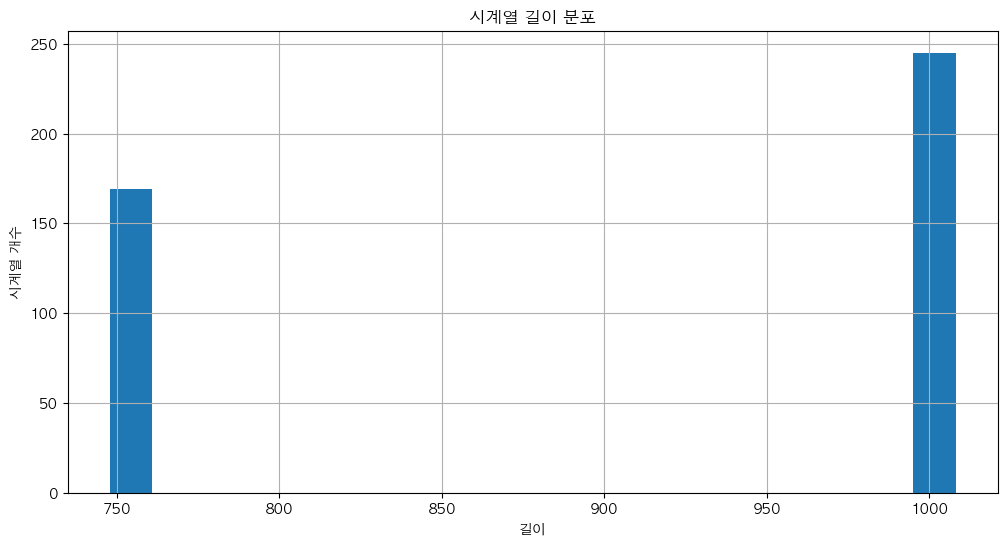

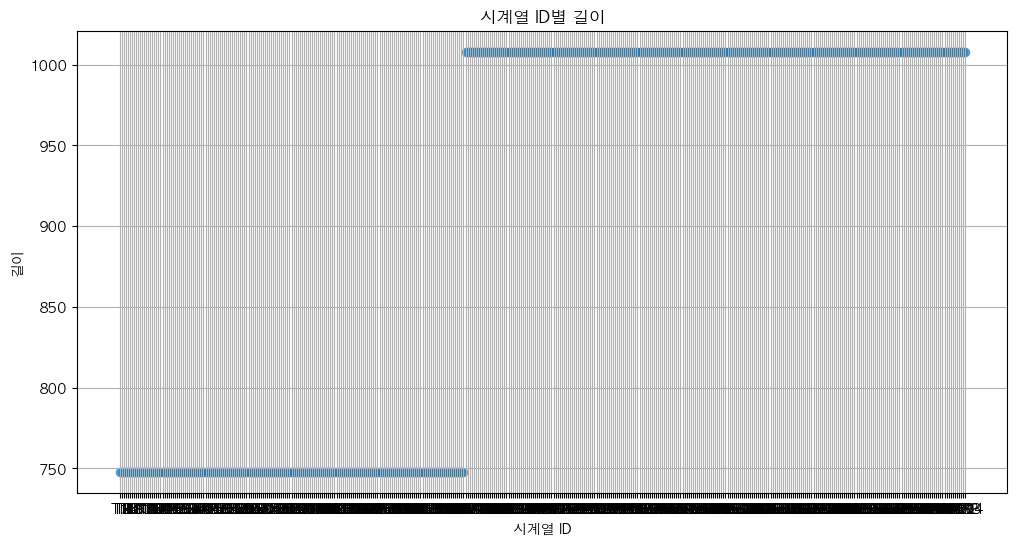

In [28]:
def check_time_series_lengths(time_series_dict):
    """
    시계열 데이터의 길이 분포를 확인하고 요약합니다.
    """
    # 각 시계열의 길이 저장
    lengths = {}
    
    for ts_id, (start_time, values) in time_series_dict.items():
        lengths[ts_id] = len(values)
    
    # 길이 분포 요약
    length_counts = {}
    for length in set(lengths.values()):
        length_counts[length] = list(lengths.values()).count(length)
    
    # 정렬된 길이 분포
    sorted_length_counts = dict(sorted(length_counts.items()))
    
    # 요약 통계
    min_length = min(lengths.values())
    max_length = max(lengths.values())
    avg_length = sum(lengths.values()) / len(lengths)
    
    print(f"시계열 총 개수: {len(lengths)}")
    print(f"최소 길이: {min_length}")
    print(f"최대 길이: {max_length}")
    print(f"평균 길이: {avg_length:.2f}")
    print("\n길이 분포:")
    for length, count in sorted_length_counts.items():
        print(f"  길이 {length}: {count}개 시계열 ({count/len(lengths)*100:.2f}%)")
    
    # 가장 짧은 시계열과 가장 긴 시계열 찾기
    shortest_ts = min(lengths, key=lengths.get)
    longest_ts = max(lengths, key=lengths.get)
    
    print(f"\n가장 짧은 시계열: {shortest_ts} (길이: {lengths[shortest_ts]})")
    print(f"가장 긴 시계열: {longest_ts} (길이: {lengths[longest_ts]})")
    
    # 시작 시간 분포 확인
    start_times = {}
    for ts_id, (start_time, _) in time_series_dict.items():
        start_time_str = start_time.strftime('%Y-%m-%d')
        if start_time_str not in start_times:
            start_times[start_time_str] = 0
        start_times[start_time_str] += 1
    
    print("\n시작 시간 분포:")
    for start_time, count in sorted(start_times.items()):
        print(f"  {start_time}: {count}개 시계열")
    
    return lengths

# 함수 실행
lengths = check_time_series_lengths(time_series_dict)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(list(lengths.values()), bins=20)
plt.title('시계열 길이 분포')
plt.xlabel('길이')
plt.ylabel('시계열 개수')
plt.grid(True)
plt.show()

# 길이에 따른 시계열 ID 분포 (산점도)
plt.figure(figsize=(12, 6))
plt.scatter(list(lengths.keys()), list(lengths.values()), alpha=0.6)
plt.title('시계열 ID별 길이')
plt.xlabel('시계열 ID')
plt.ylabel('길이')
plt.grid(True)
plt.show()


첫 번째 시계열 (T1)의 첫 10개 값:
[605.0, 586.0, 586.0, 559.0, 511.0, 443.0, 422.0, 395.0, 382.0, 370.0]


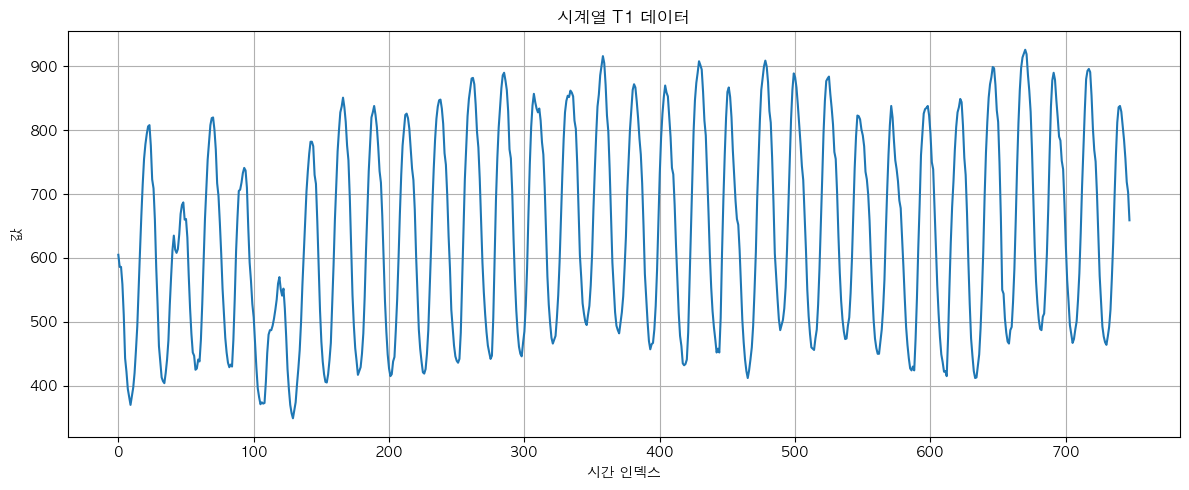

In [51]:
# 첫 번째 시계열 확인
if time_series_dict:
    first_ts_id = next(iter(time_series_dict))
    first_ts_start, first_ts_values = time_series_dict[first_ts_id]
    
    print(f"\n첫 번째 시계열 ({first_ts_id})의 첫 10개 값:")
    print(first_ts_values[:10])
    
    # 시각화
    plt.figure(figsize=(12, 5))
    plt.plot(first_ts_values)
    plt.title(f"시계열 {first_ts_id} 데이터")
    plt.xlabel("시간 인덱스")
    plt.ylabel("값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## M4 시계열 데이터 EDA

In [52]:
def calculate_basic_statistics(time_series_dict):
    """
    각 시계열의 기본 통계량을 계산합니다.
    """
    stats = []
    
    for ts_id, (start_time, values) in time_series_dict.items():
        # NaN 값 제외한 유효한 값들만 사용
        values_clean = np.array([v for v in values if not np.isnan(v)])
        
        if len(values_clean) > 0:
            # 기본 통계량 계산
            stat = {
                'ts_id': ts_id,
                'length': len(values),
                'mean': np.mean(values_clean),
                'median': np.median(values_clean),
                'std': np.std(values_clean),
                'min': np.min(values_clean),
                'max': np.max(values_clean),
                'range': np.max(values_clean) - np.min(values_clean),
                'cv': np.std(values_clean) / np.mean(values_clean) if np.mean(values_clean) != 0 else np.nan
            }
            stats.append(stat)
    
    # DataFrame으로 변환
    stats_df = pd.DataFrame(stats)
    return stats_df

# 기본 통계량 계산 및 확인
statistics_df = calculate_basic_statistics(time_series_dict)

# 전체 통계량 요약
print("전체 시계열 통계량 요약:")
print(statistics_df.describe())

# 처음 5개 시계열의 통계량
print("\n처음 5개 시계열의 통계량:")
print(statistics_df.head())

전체 시계열 통계량 요약:
            length           mean         median           std            min  \
count   414.000000     414.000000     414.000000    414.000000     414.000000   
mean    901.864734    6859.557045    6825.917633   1288.294848    4382.021981   
std     127.945362   38772.268817   38899.041144   6521.625902   25921.786052   
min     748.000000      13.754464      13.550000      1.305876      10.000000   
25%     748.000000      18.688938      18.700000      4.073534      10.100000   
50%    1008.000000      83.509425      72.750000     54.086016      11.000000   
75%    1008.000000     938.614639     842.875000    398.633280     263.250000   
max    1008.000000  527471.171123  529786.000000  87788.210312  353551.000000   

                 max          range          cv  
count     414.000000     414.000000  414.000000  
mean     9729.239130    5347.217150    0.391473  
std     51986.350224   26140.175288    0.302052  
min        17.400000       3.800000    0.047000  
25%  

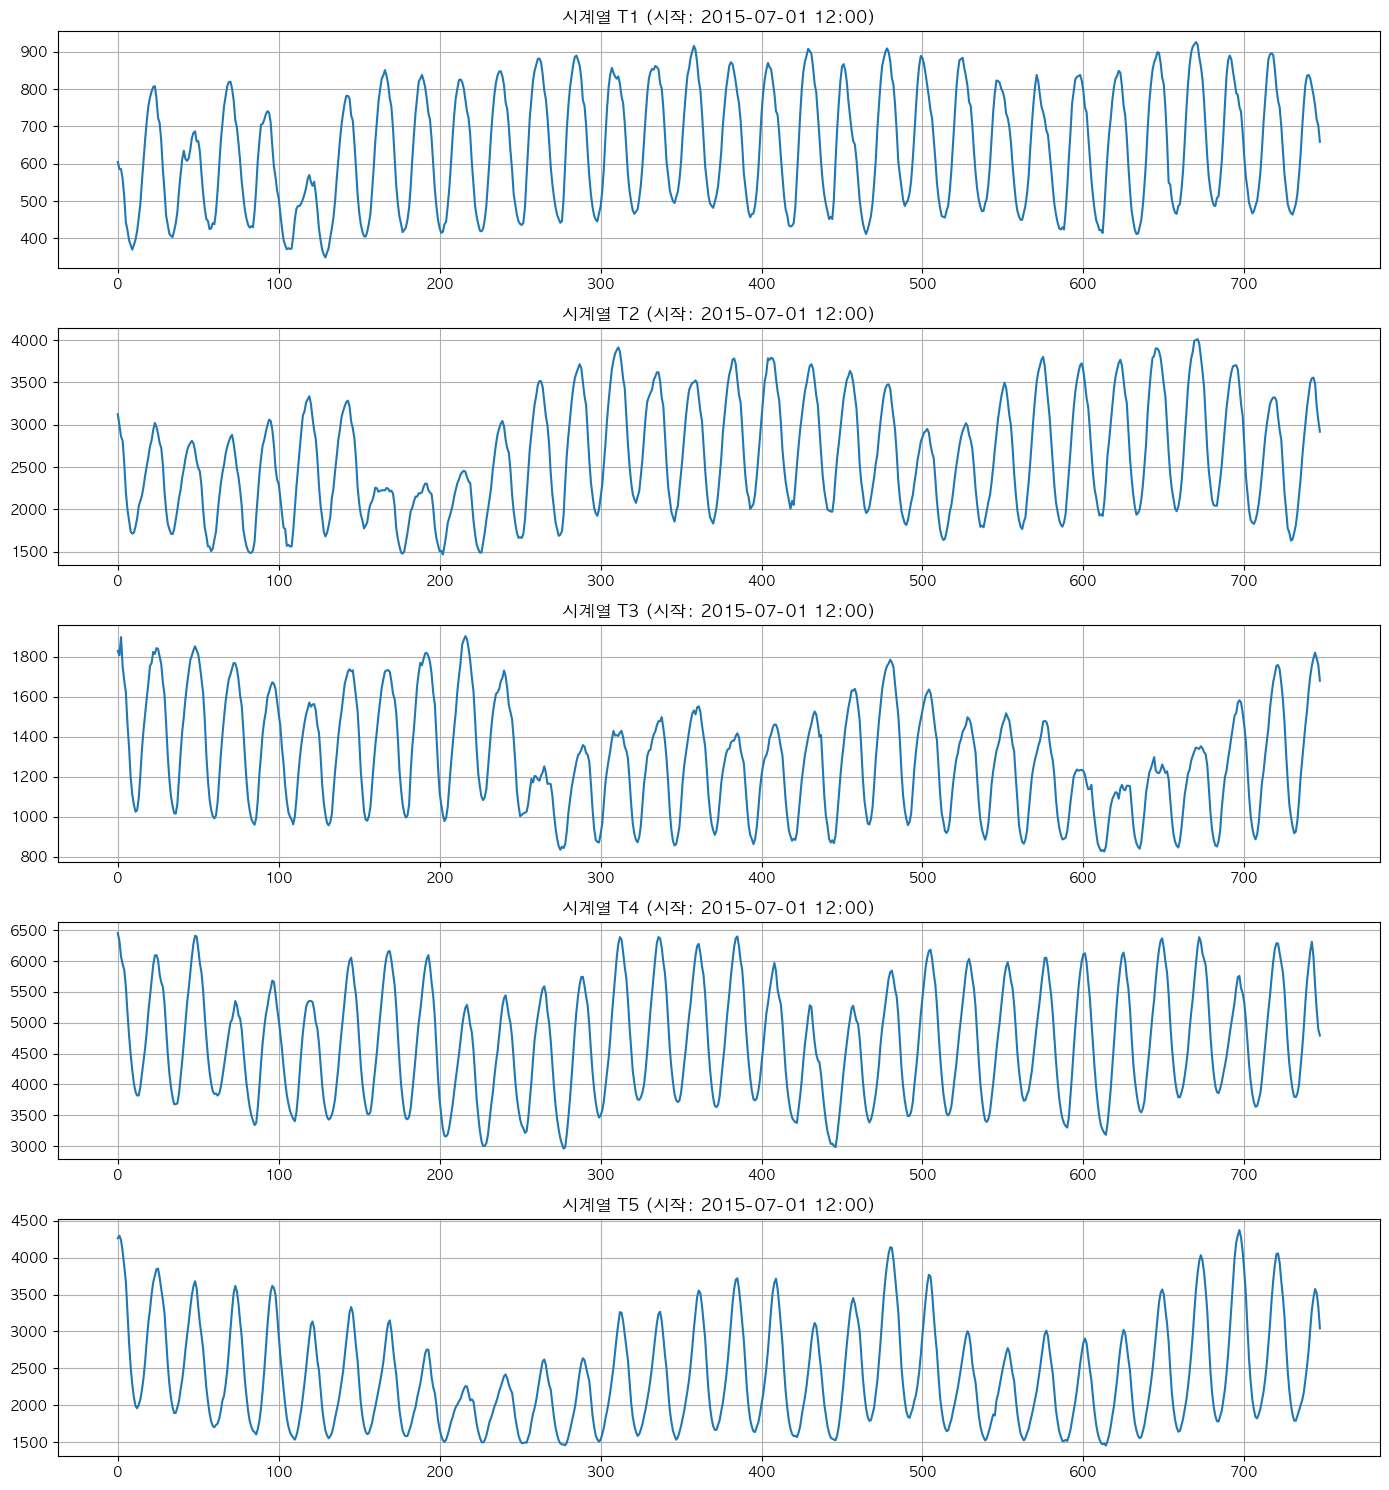

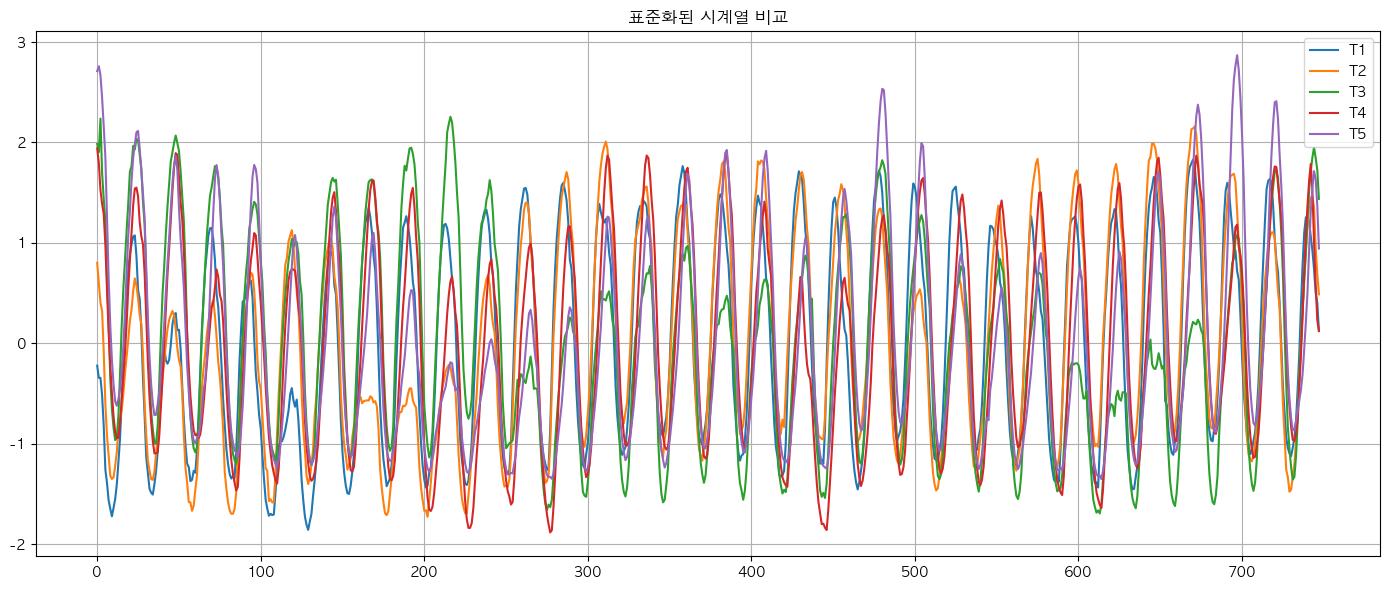

In [53]:
def visualize_sample_time_series(time_series_dict, num_samples=5):
    """
    샘플 시계열을 시각화합니다.
    """
    # 시각화할 시계열 ID 선택
    sample_ids = list(time_series_dict.keys())[:num_samples]
    
    # 1. 개별 시계열 플롯
    plt.figure(figsize=(14, 3*num_samples))
    
    for i, ts_id in enumerate(sample_ids):
        start_time, values = time_series_dict[ts_id]
        
        plt.subplot(num_samples, 1, i+1)
        plt.plot(values)
        plt.title(f'시계열 {ts_id} (시작: {start_time.strftime("%Y-%m-%d %H:%M")})')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 2. 다중 시계열 오버레이 (표준화 후)
    plt.figure(figsize=(14, 6))
    
    for ts_id in sample_ids:
        _, values = time_series_dict[ts_id]
        values_np = np.array(values)
        
        # 표준화 (Z-score)
        values_mean = np.mean(values_np)
        values_std = np.std(values_np)
        values_standardized = (values_np - values_mean) / values_std
        
        plt.plot(values_standardized, label=ts_id)
    
    plt.title('표준화된 시계열 비교')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 샘플 시계열 시각화
visualize_sample_time_series(time_series_dict)

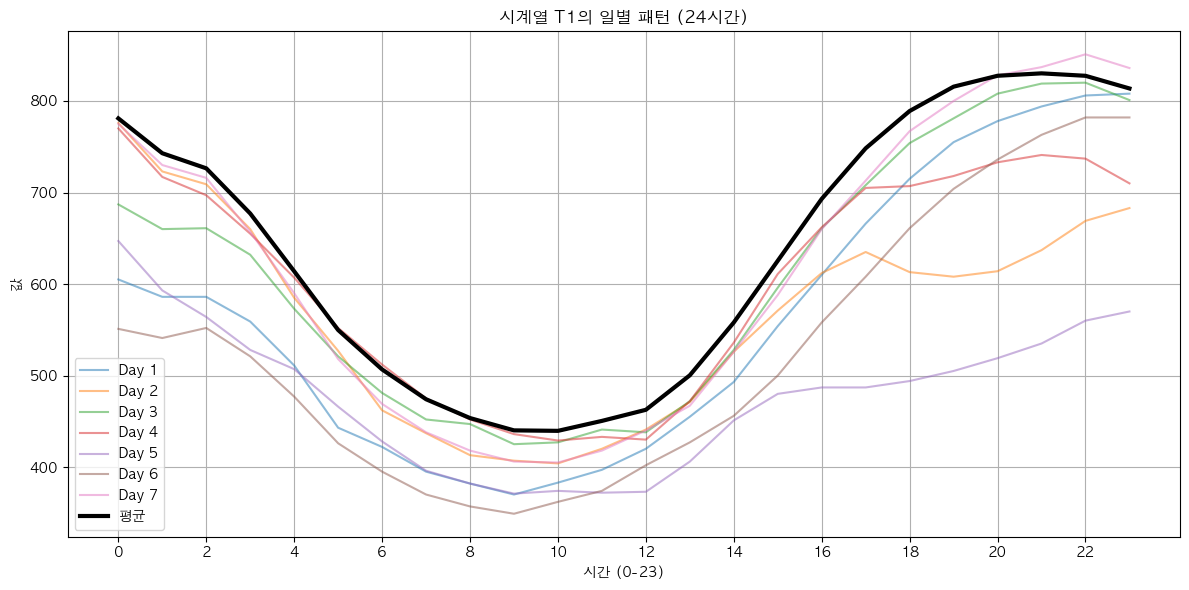

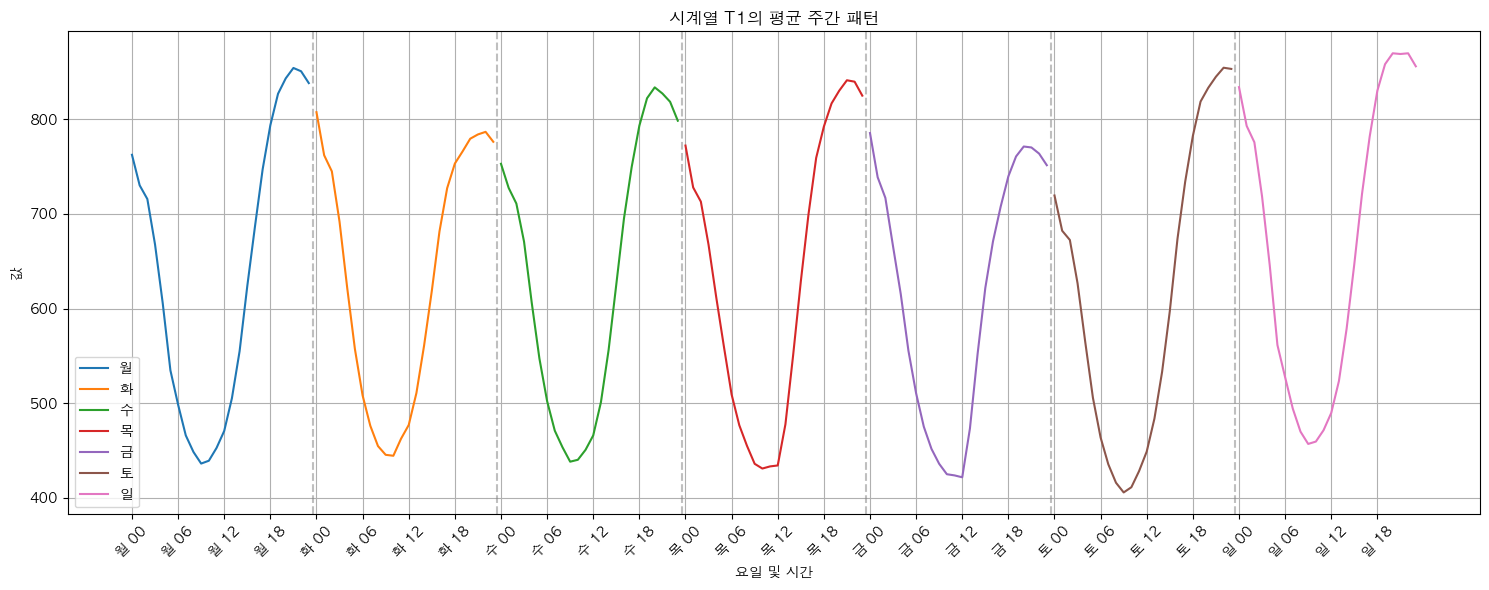

In [54]:
def visualize_daily_weekly_patterns(time_series_dict, sample_id=None):
    """
    일별/주별 패턴을 시각화합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # 일별 패턴 분석 (24시간)
    if len(values_np) >= 24:
        days = len(values_np) // 24
        daily_data = values_np[:days * 24].reshape(days, 24)
        
        plt.figure(figsize=(12, 6))
        
        # 각 날짜의 패턴
        for i in range(min(days, 7)):  # 최대 7일까지만 표시
            plt.plot(range(24), daily_data[i], alpha=0.5, label=f'Day {i+1}')
        
        # 평균 패턴
        plt.plot(range(24), daily_data.mean(axis=0), 'k-', linewidth=3, label='평균')
        
        plt.title(f'시계열 {sample_id}의 일별 패턴 (24시간)')
        plt.xlabel('시간 (0-23)')
        plt.ylabel('값')
        plt.xticks(range(0, 24, 2))
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # 주별 패턴 분석 (168시간 = 7일)
    if len(values_np) >= 168:
        weeks = len(values_np) // 168
        weekly_data = values_np[:weeks * 168].reshape(weeks, 168)
        
        plt.figure(figsize=(15, 6))
        
        # 평균 주간 패턴
        weekly_avg = weekly_data.mean(axis=0)
        days_of_week = ['월', '화', '수', '목', '금', '토', '일']
        
        for i in range(7):
            start_idx = i * 24
            end_idx = (i + 1) * 24
            plt.plot(range(start_idx, end_idx), weekly_avg[start_idx:end_idx], 
                     label=days_of_week[i])
            
            # 날짜 구분선
            if i < 6:
                plt.axvline(x=end_idx - 0.5, color='gray', linestyle='--', alpha=0.5)
        
        plt.title(f'시계열 {sample_id}의 평균 주간 패턴')
        plt.xlabel('요일 및 시간')
        plt.ylabel('값')
        
        # x축 레이블 설정
        x_ticks = []
        x_labels = []
        for i in range(7):
            for h in range(0, 24, 6):
                x_ticks.append(i * 24 + h)
                x_labels.append(f'{days_of_week[i]} {h:02d}')
        
        plt.xticks(x_ticks, x_labels, rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# 일별/주별 패턴 시각화 (첫 번째 시계열 사용)
first_ts_id = next(iter(time_series_dict.keys()))
visualize_daily_weekly_patterns(time_series_dict, first_ts_id)

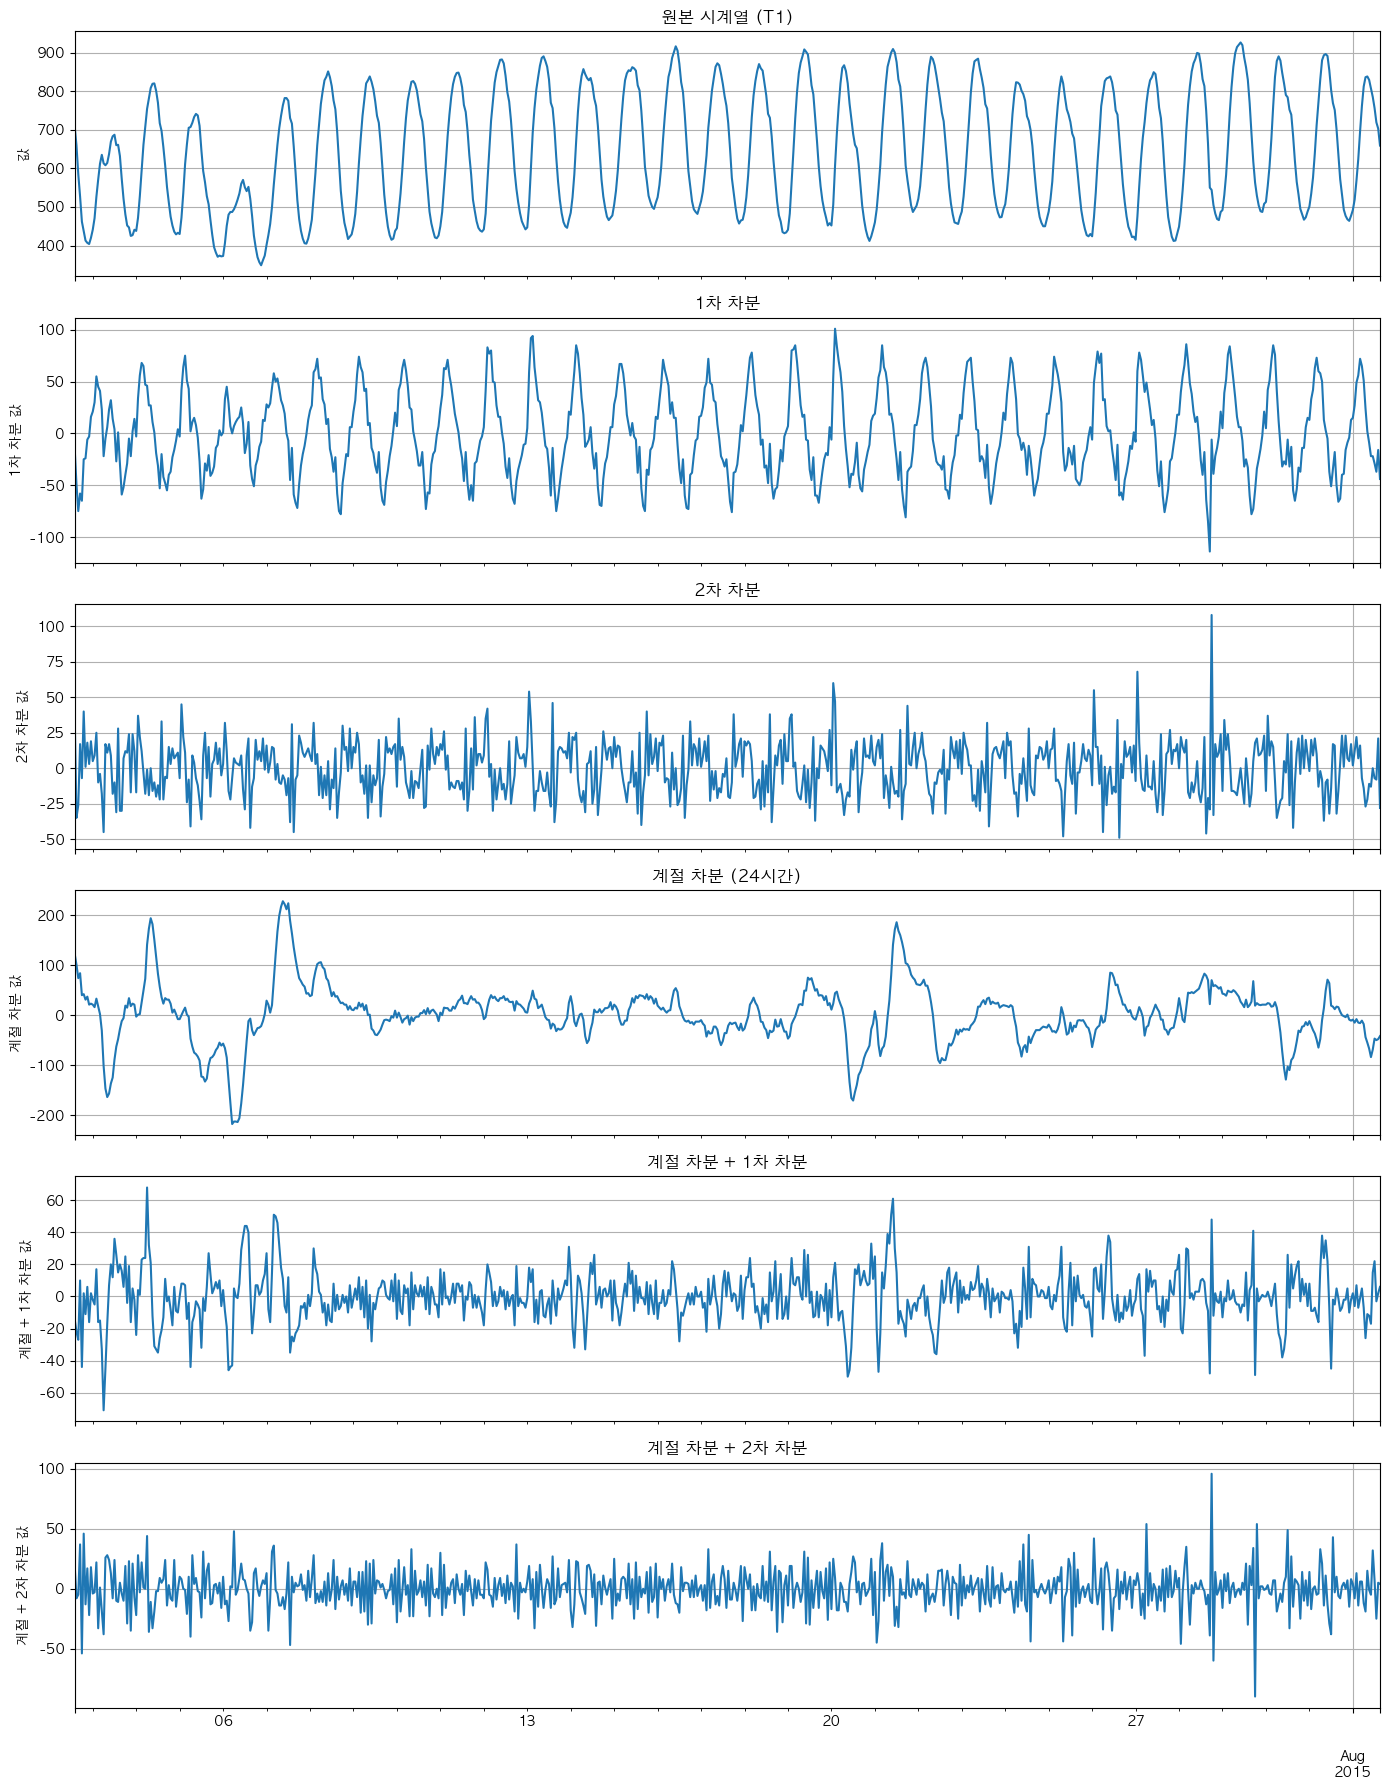


=== 원본 시계열 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -2.2417
  p-value: 0.1915
  정상성 여부: 비정상
KPSS 검정 결과:
  KPSS 통계량: 0.9406
  p-value: 0.0100
  정상성 여부: 비정상

=== 1차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -13.8171
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0078
  p-value: 0.1000
  정상성 여부: 정상

=== 2차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -19.1242
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0071
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -7.2179
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0653
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 + 1차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -11.3605
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0290
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 + 2차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -12.8241
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0766
  p-value: 0.1000
  정상성 여부: 정상


/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of th

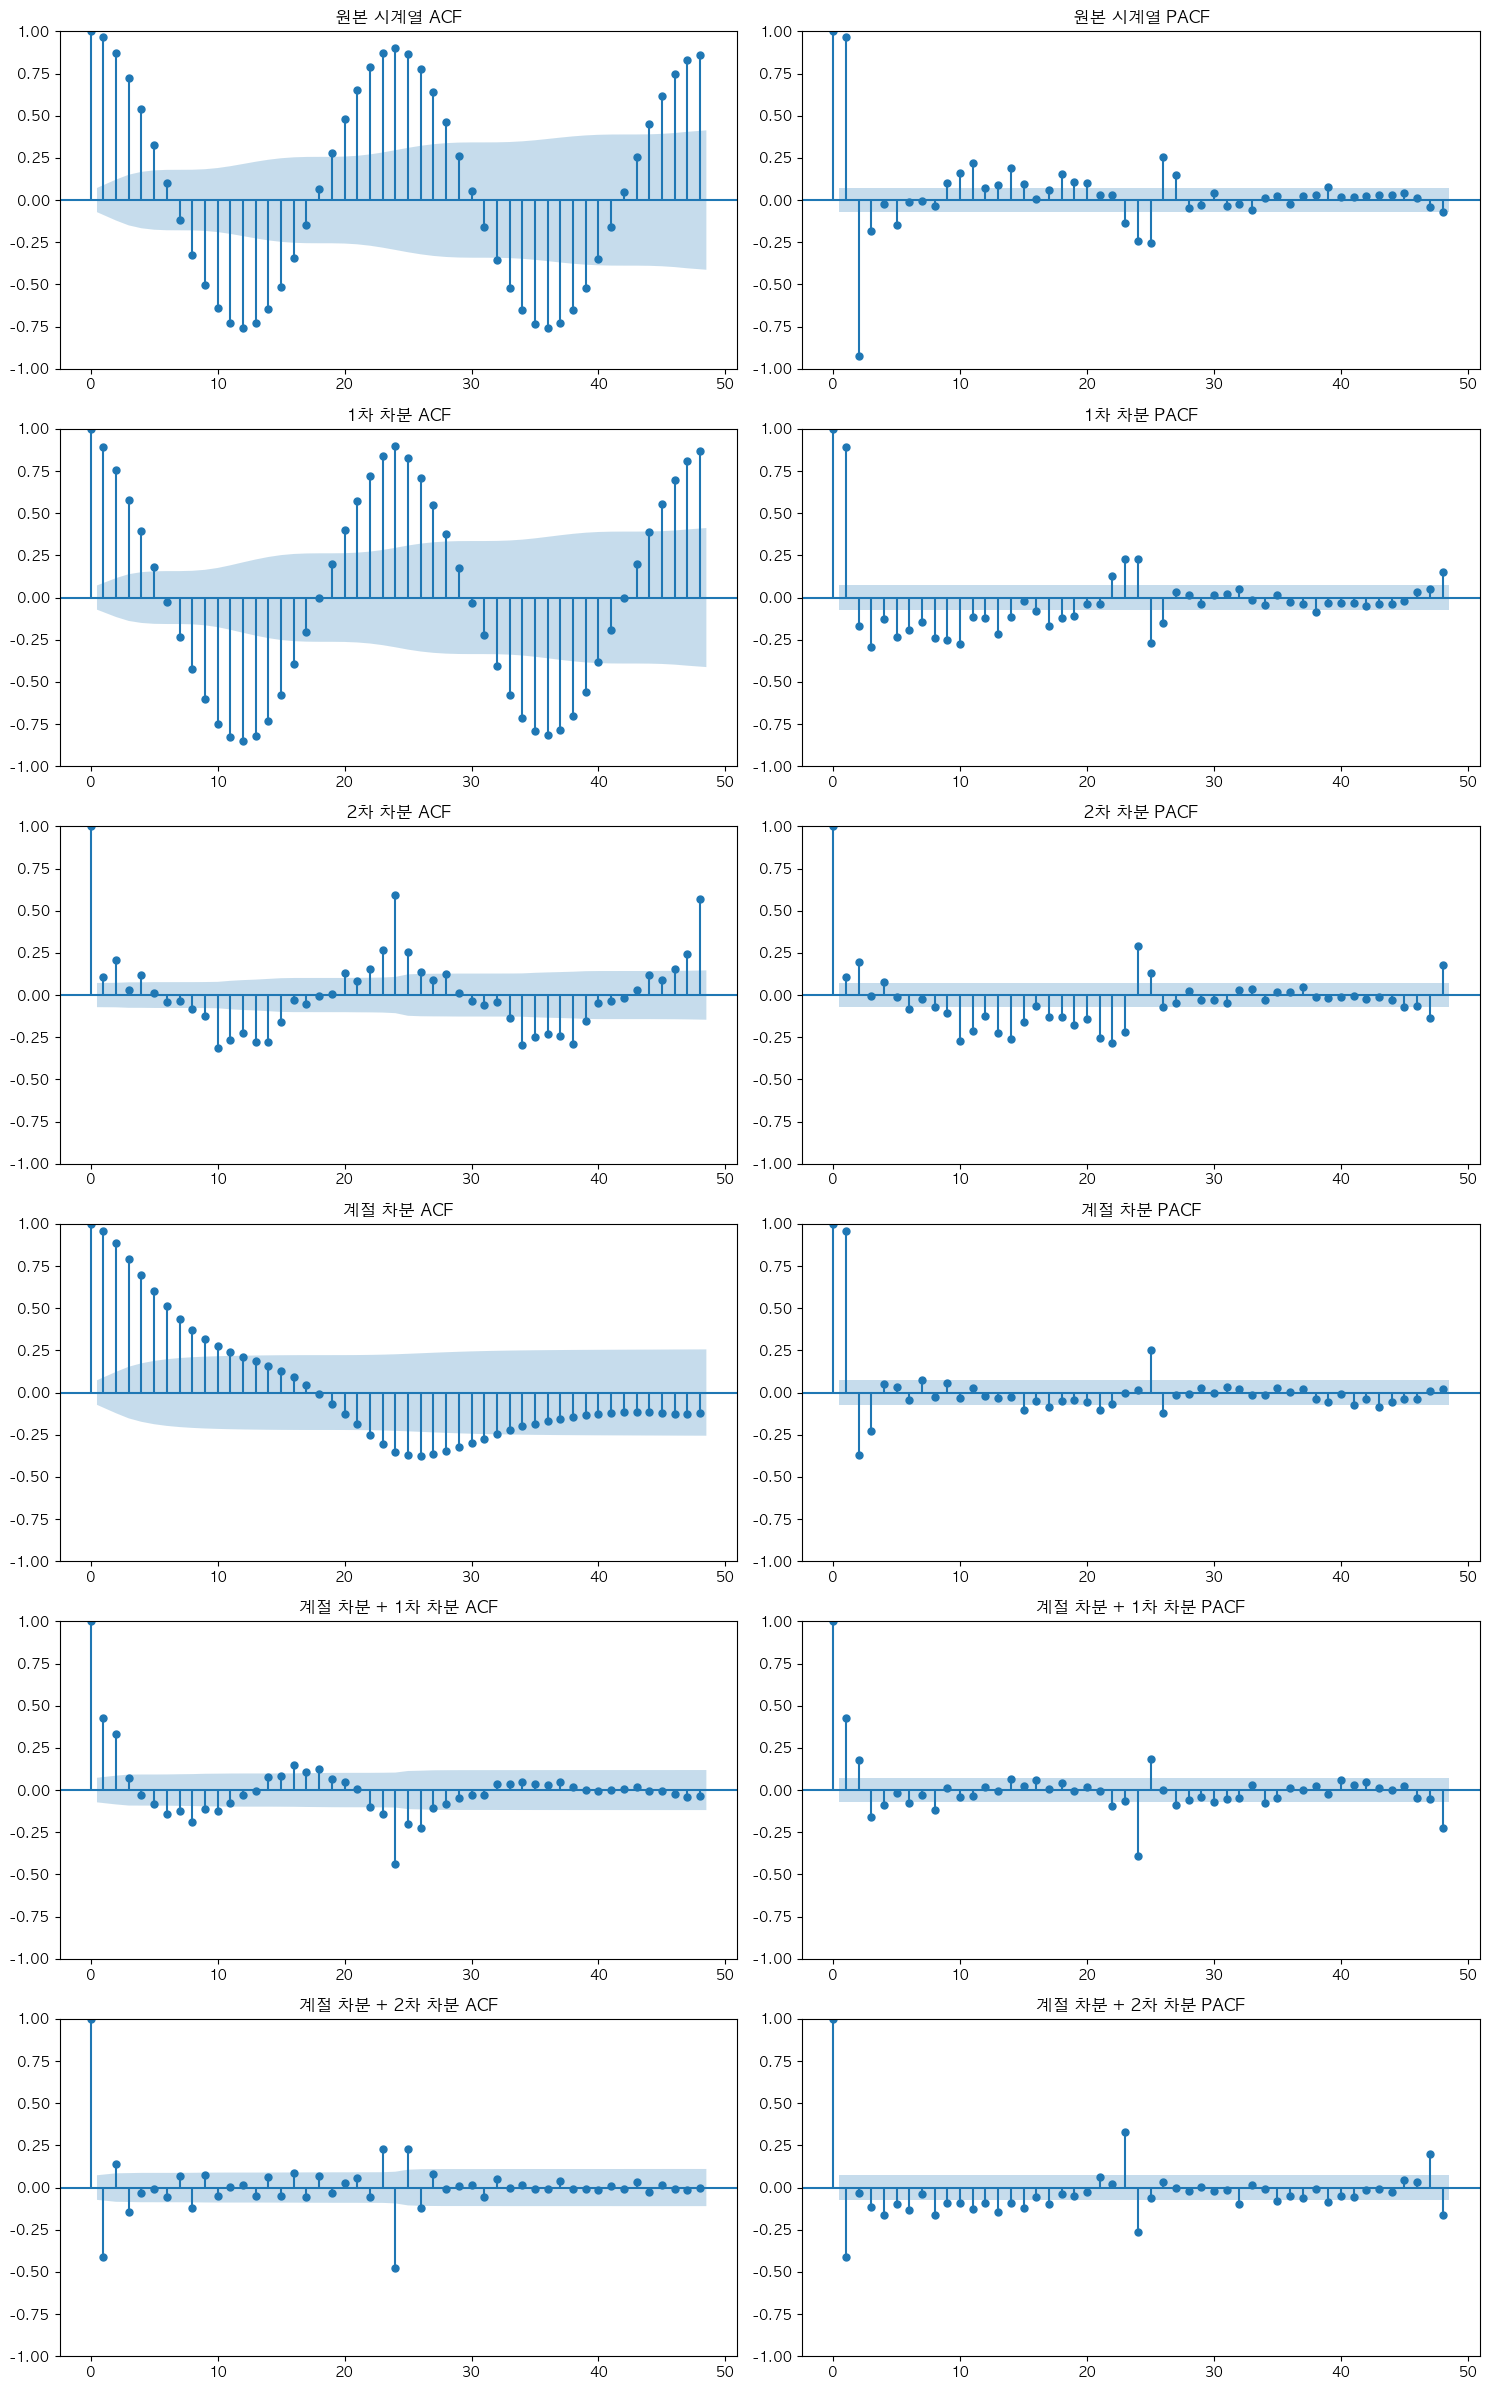

In [26]:
def apply_and_visualize_differencing(time_series_dict, sample_id=None):
    """
    시계열 데이터에 다양한 차분을 적용하고 시각화합니다:
    1. 1차 차분
    2. 2차 차분
    3. 계절 차분(24시간)
    4. 계절 차분 + 1차 차분
    5. 계절 차분 + 2차 차분
    
    각 단계별로 ADF 및 KPSS 정상성 검정을 수행합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # pandas Series로 변환 (날짜 인덱스 포함)
    date_range = pd.date_range(start=start_time, periods=len(values_np), freq='h')
    original_series = pd.Series(values_np, index=date_range)
    
    # 차분 적용
    # 1. 1차 차분
    diff1 = original_series.diff().dropna()
    
    # 2. 2차 차분
    diff2 = diff1.diff().dropna()
    
    # 3. 계절 차분 (24시간)
    seasonal_diff = original_series.diff(periods=24).dropna()
    
    # 4. 계절 차분 + 1차 차분
    seasonal_diff1 = seasonal_diff.diff().dropna()
    
    # 5. 계절 차분 + 2차 차분
    seasonal_diff2 = seasonal_diff1.diff().dropna()
    
    # 차분 적용 결과 시각화
    fig, axes = plt.subplots(6, 1, figsize=(14, 18), sharex=True)
    
    # 원본 시계열
    original_series.plot(ax=axes[0], title=f'원본 시계열 ({sample_id})')
    axes[0].set_ylabel('값')
    axes[0].grid(True)
    
    # 1차 차분
    diff1.plot(ax=axes[1], title=f'1차 차분')
    axes[1].set_ylabel('1차 차분 값')
    axes[1].grid(True)
    
    # 2차 차분
    diff2.plot(ax=axes[2], title=f'2차 차분')
    axes[2].set_ylabel('2차 차분 값')
    axes[2].grid(True)
    
    # 계절 차분 (24시간)
    seasonal_diff.plot(ax=axes[3], title=f'계절 차분 (24시간)')
    axes[3].set_ylabel('계절 차분 값')
    axes[3].grid(True)
    
    # 계절 차분 + 1차 차분
    seasonal_diff1.plot(ax=axes[4], title=f'계절 차분 + 1차 차분')
    axes[4].set_ylabel('계절 + 1차 차분 값')
    axes[4].grid(True)
    
    # 계절 차분 + 2차 차분
    seasonal_diff2.plot(ax=axes[5], title=f'계절 차분 + 2차 차분')
    axes[5].set_ylabel('계절 + 2차 차분 값')
    axes[5].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # ADF 및 KPSS 정상성 검정
    from statsmodels.tsa.stattools import adfuller, kpss
    
    # 정상성 검정 함수
    def run_stationarity_tests(series, name):
        print(f"\n=== {name} 정상성 검정 ===")
        
        # ADF 검정
        adf_result = adfuller(series.dropna())
        print(f"ADF 검정 결과:")
        print(f'  ADF 통계량: {adf_result[0]:.4f}')
        print(f'  p-value: {adf_result[1]:.4f}')
        print(f'  정상성 여부: {"정상" if adf_result[1] < 0.05 else "비정상"}')
        
        # KPSS 검정
        try:
            kpss_result = kpss(series.dropna())
            print(f"KPSS 검정 결과:")
            print(f'  KPSS 통계량: {kpss_result[0]:.4f}')
            print(f'  p-value: {kpss_result[1]:.4f}')
            print(f'  정상성 여부: {"정상" if kpss_result[1] > 0.05 else "비정상"}')
        except:
            print("KPSS 검정 실패 - 시계열 특성이나 길이 문제일 수 있습니다.")
    
    # 각 시계열에 대한 정상성 검정
    run_stationarity_tests(original_series, "원본 시계열")
    run_stationarity_tests(diff1, "1차 차분")
    run_stationarity_tests(diff2, "2차 차분")
    run_stationarity_tests(seasonal_diff, "계절 차분")
    run_stationarity_tests(seasonal_diff1, "계절 차분 + 1차 차분")
    run_stationarity_tests(seasonal_diff2, "계절 차분 + 2차 차분")
    
    # ACF/PACF 분석
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    # 각 시계열의 ACF/PACF 시각화
    fig, axes = plt.subplots(6, 2, figsize=(15, 24))
    
    # 차분별 시계열 및 이름 목록
    series_list = [
        (original_series, "원본 시계열"),
        (diff1, "1차 차분"),
        (diff2, "2차 차분"),
        (seasonal_diff, "계절 차분"),
        (seasonal_diff1, "계절 차분 + 1차 차분"),
        (seasonal_diff2, "계절 차분 + 2차 차분")
    ]
    
    # 각 시계열에 대한 ACF/PACF 시각화
    for i, (series, name) in enumerate(series_list):
        try:
            plot_acf(series.dropna(), lags=48, ax=axes[i, 0])
            axes[i, 0].set_title(f'{name} ACF')
            
            plot_pacf(series.dropna(), lags=48, ax=axes[i, 1])
            axes[i, 1].set_title(f'{name} PACF')
        except:
            axes[i, 0].text(0.5, 0.5, f"ACF 계산 실패", ha='center', va='center')
            axes[i, 1].text(0.5, 0.5, f"PACF 계산 실패", ha='center', va='center')
            axes[i, 0].set_title(f'{name} ACF')
            axes[i, 1].set_title(f'{name} PACF')
    
    plt.tight_layout()
    plt.show()
    
    # 결과 시계열 반환
    return {
        "original": original_series,
        "diff1": diff1,
        "diff2": diff2,
        "seasonal_diff": seasonal_diff,
        "seasonal_diff1": seasonal_diff1,
        "seasonal_diff2": seasonal_diff2
    }

first_ts_id = next(iter(time_series_dict.keys()))
diff_results = apply_and_visualize_differencing(time_series_dict, first_ts_id)

훈련 데이터 크기: 580
테스트 데이터 크기: 168
SARIMA 모델 학습 중...
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  580
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -1985.769
Date:                            Tue, 11 Mar 2025   AIC                           3983.539
Time:                                    15:34:37   BIC                           4009.165
Sample:                                07-01-2015   HQIC                          3993.570
                                     - 07-25-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0459      0.189     -0.243      0.808      -0.41

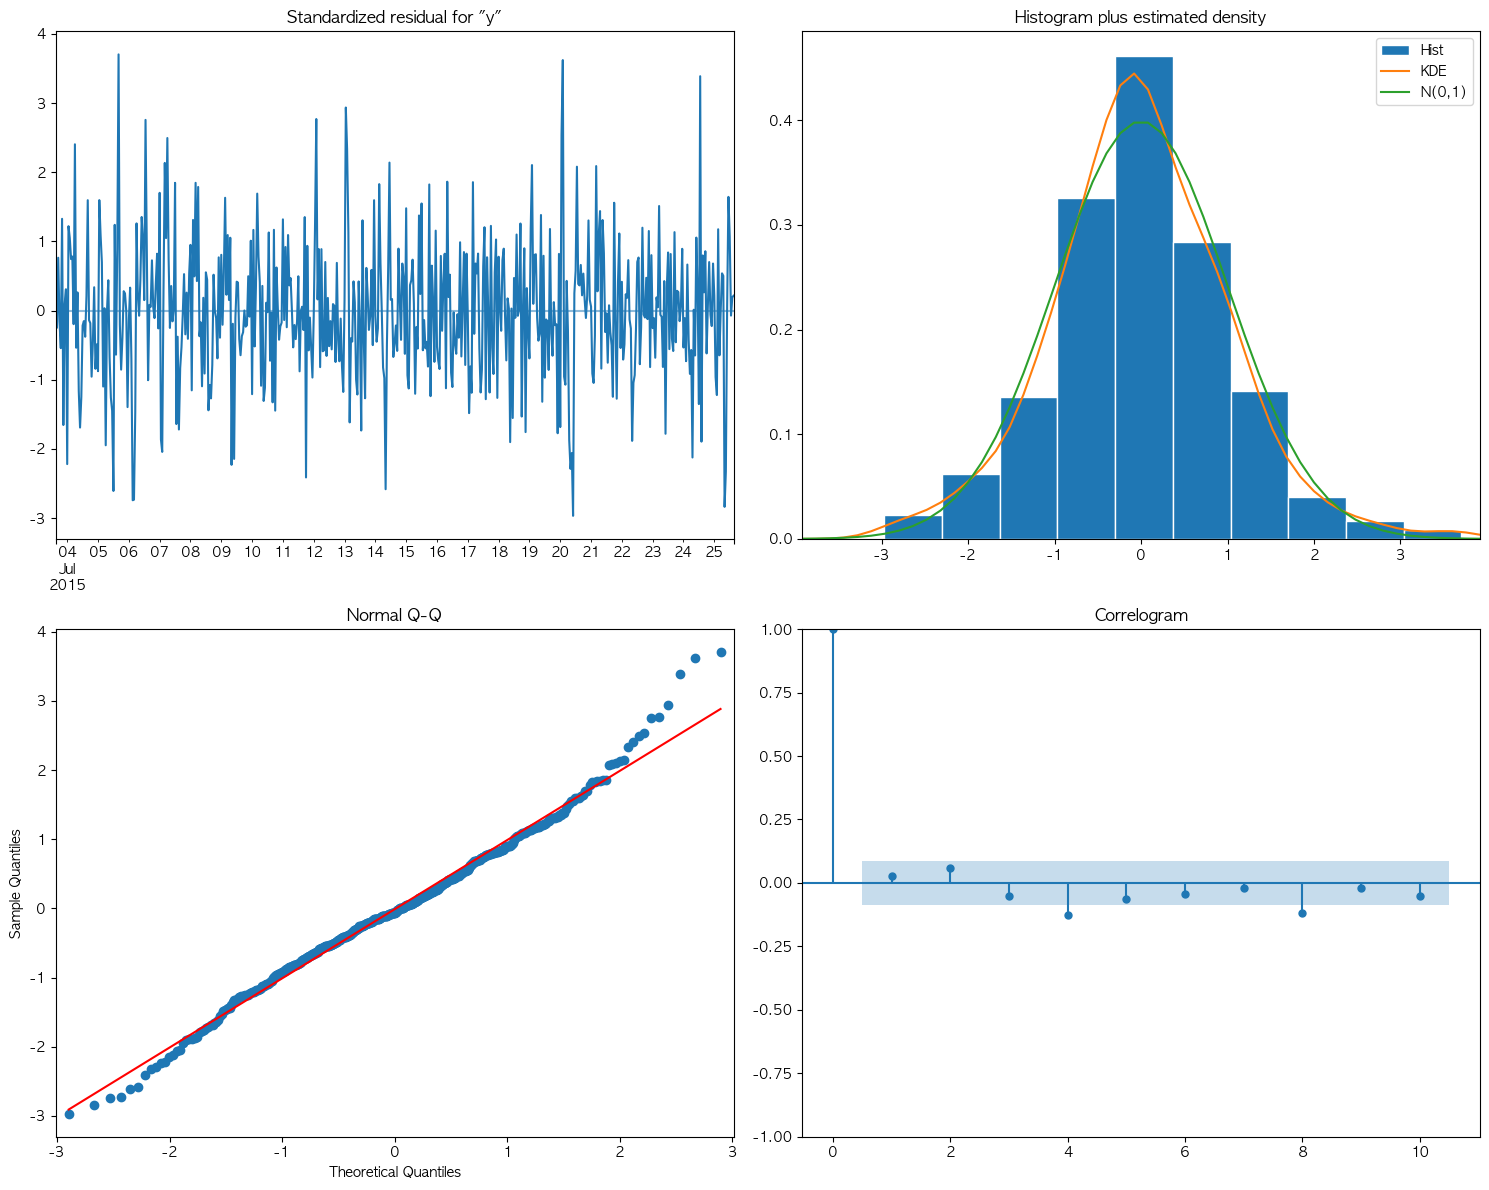

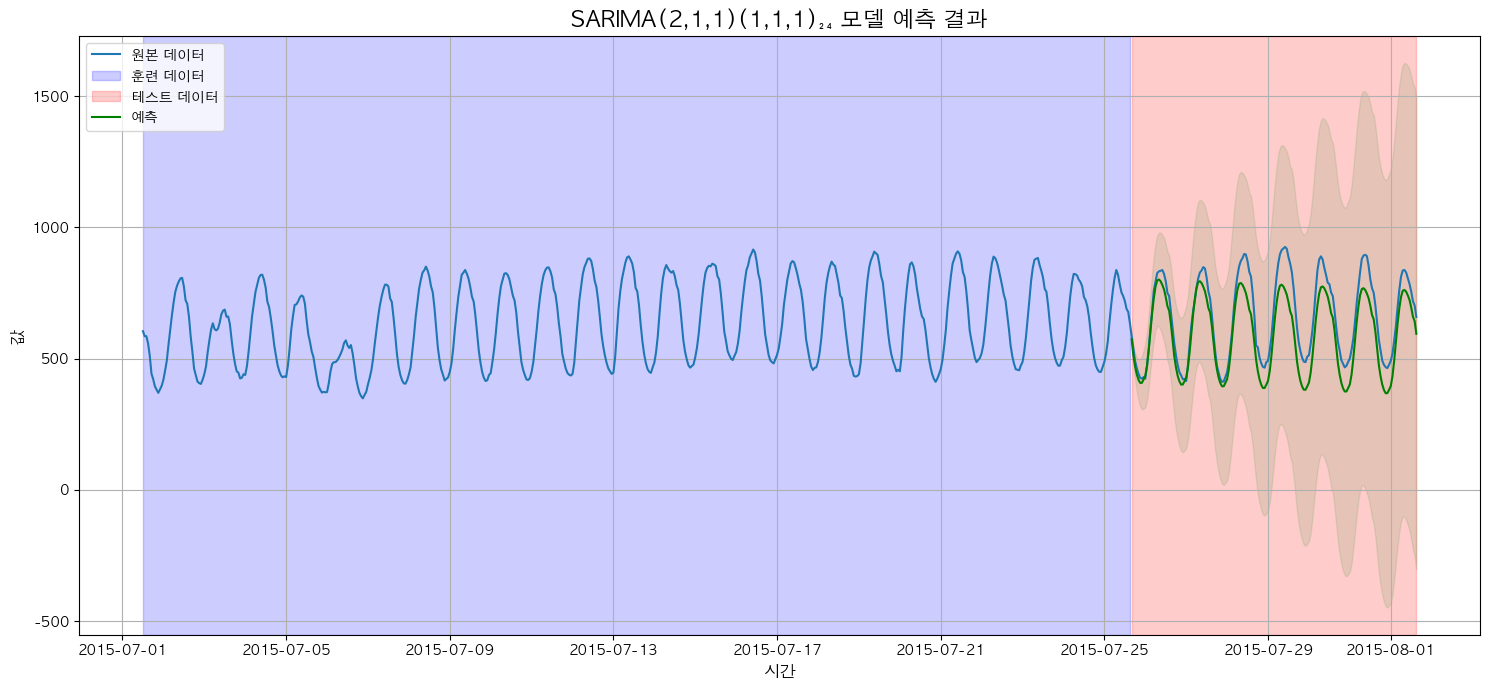

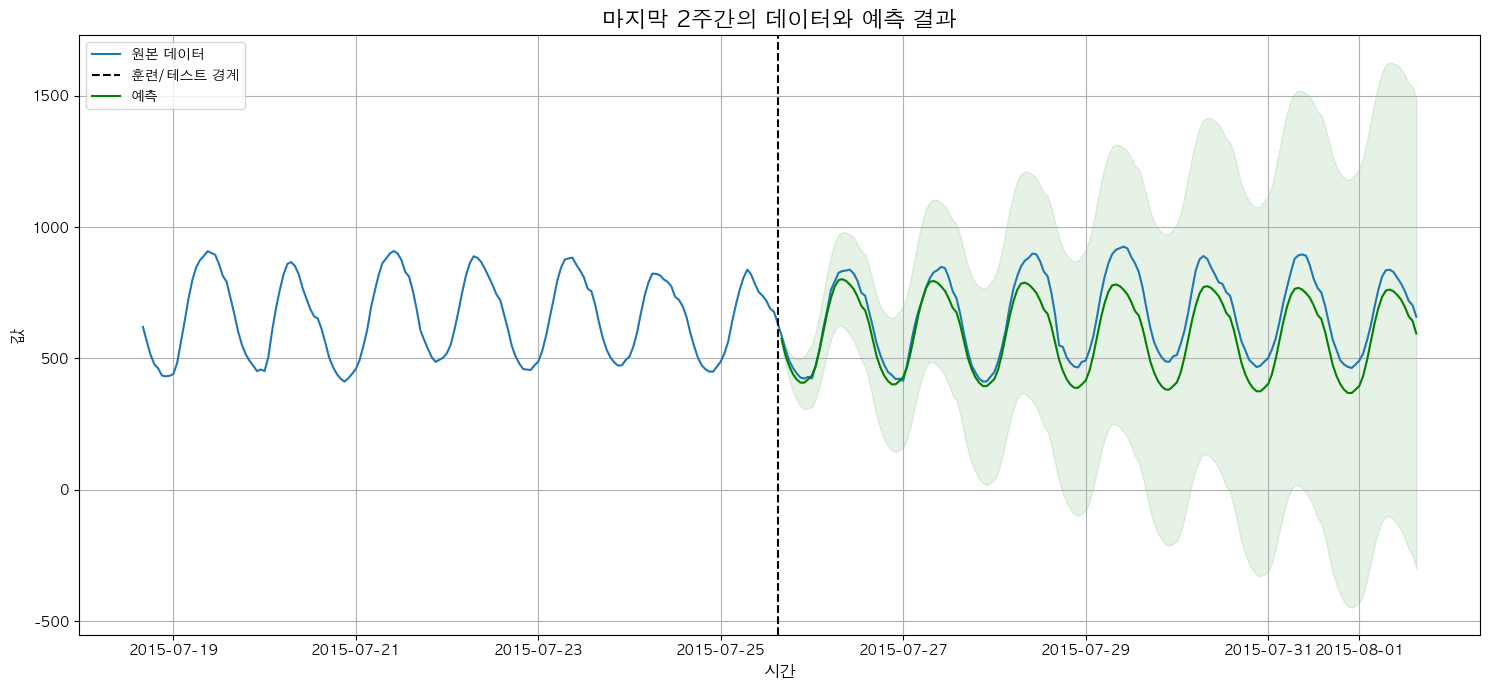

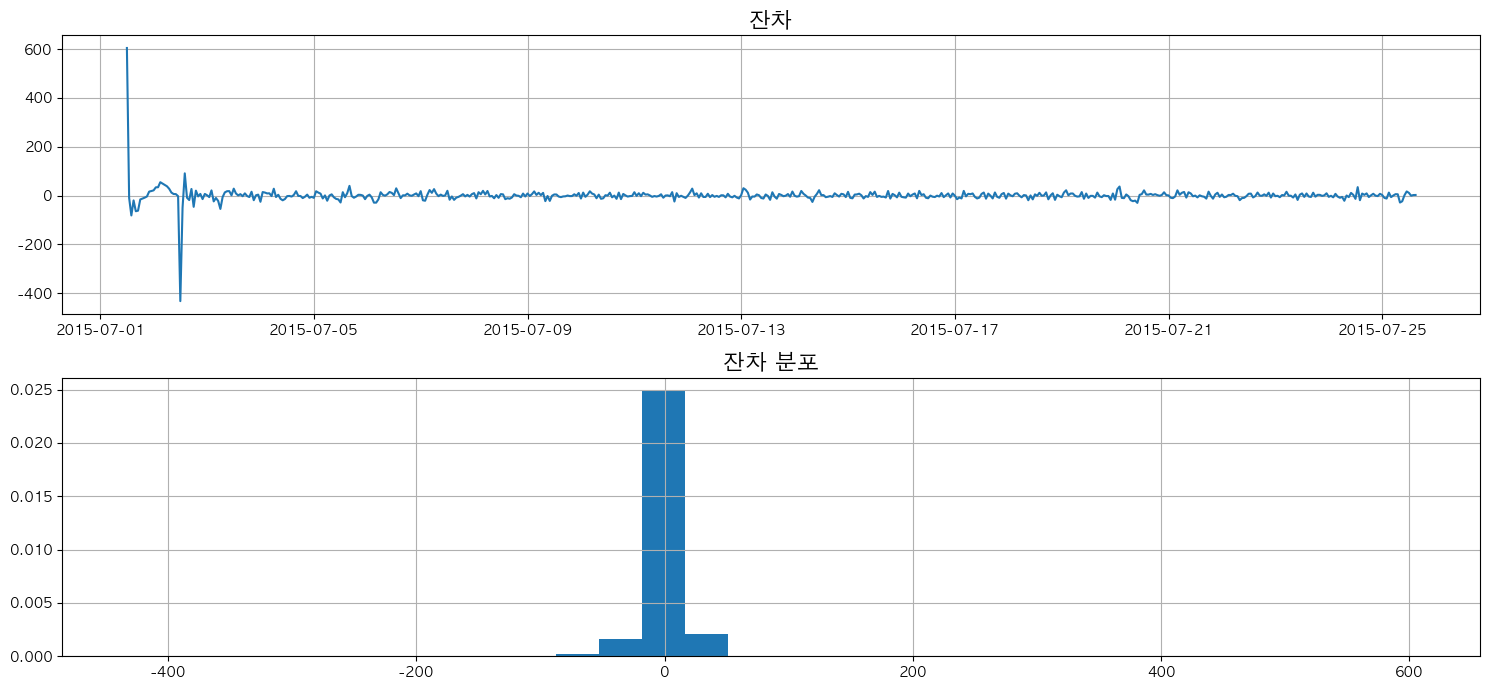

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 준비 (T1 시계열 데이터 사용)
def get_time_series_data(time_series_dict, ts_id='T1'):
    start_time, values = time_series_dict[ts_id]
    date_range = pd.date_range(start=start_time, periods=len(values), freq='h')
    return pd.Series(values, index=date_range)

# 시계열 데이터 가져오기
ts_data = get_time_series_data(time_series_dict, 'T1')

# 훈련/테스트 세트 분할 (마지막 168시간(7일)을 테스트 데이터로 사용)
train_size = len(ts_data) - 168
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

print(f'훈련 데이터 크기: {len(train_data)}')
print(f'테스트 데이터 크기: {len(test_data)}')

# SARIMA(2,1,1)(1,1,1)24 모델 구현
sarima_model = SARIMAX(
    train_data,
    order=(2, 1, 1),             # 비계절 부분: (p, d, q)
    seasonal_order=(1, 1, 1, 24), # 계절 부분: (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 모델 학습
print('SARIMA 모델 학습 중...')
sarima_results = sarima_model.fit(disp=False)

# 모델 요약 출력
print(sarima_results.summary())

# 예측 수행
forecast_steps = len(test_data)
print(f'{forecast_steps}시간 예측 수행 중...')
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 예측 성능 평가
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
mape = np.mean(np.abs((test_data - forecast_mean) / test_data)) * 100

print(f'평가 지표:')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

# 모델 진단
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()
plt.show()

# 예측 결과 시각화
plt.figure(figsize=(15, 7))

# 원본 데이터
plt.plot(ts_data, label='원본 데이터')

# 훈련 데이터 영역 표시
plt.axvspan(ts_data.index[0], ts_data.index[train_size-1], alpha=0.2, color='blue', label='훈련 데이터')

# 테스트 데이터 영역 표시
plt.axvspan(ts_data.index[train_size], ts_data.index[-1], alpha=0.2, color='red', label='테스트 데이터')

# 예측값
plt.plot(forecast_mean, 'g', label='예측')

# 신뢰구간
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='g', alpha=0.1
)

plt.title('SARIMA(2,1,1)(1,1,1)₂₄ 모델 예측 결과', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 마지막 2주간의 데이터와 예측 결과를 확대해서 시각화
plt.figure(figsize=(15, 7))

# 마지막 2주간(336시간)의 데이터
last_n = 336
last_n_data = ts_data[-last_n:]

# 원본 데이터
plt.plot(last_n_data, label='원본 데이터')

# 훈련/테스트 경계
train_end = ts_data.index[train_size-1]
plt.axvline(train_end, linestyle='--', color='k', label='훈련/테스트 경계')

# 예측값
plt.plot(forecast_mean, 'g', label='예측')

# 신뢰구간
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='g', alpha=0.1
)

plt.title('마지막 2주간의 데이터와 예측 결과', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 잔차 분석
residuals = sarima_results.resid[~np.isnan(sarima_results.resid)]

plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(residuals)
plt.title('잔차', fontsize=16)
plt.grid(True)

plt.subplot(212)
plt.hist(residuals, bins=30, density=True)
plt.title('잔차 분포', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

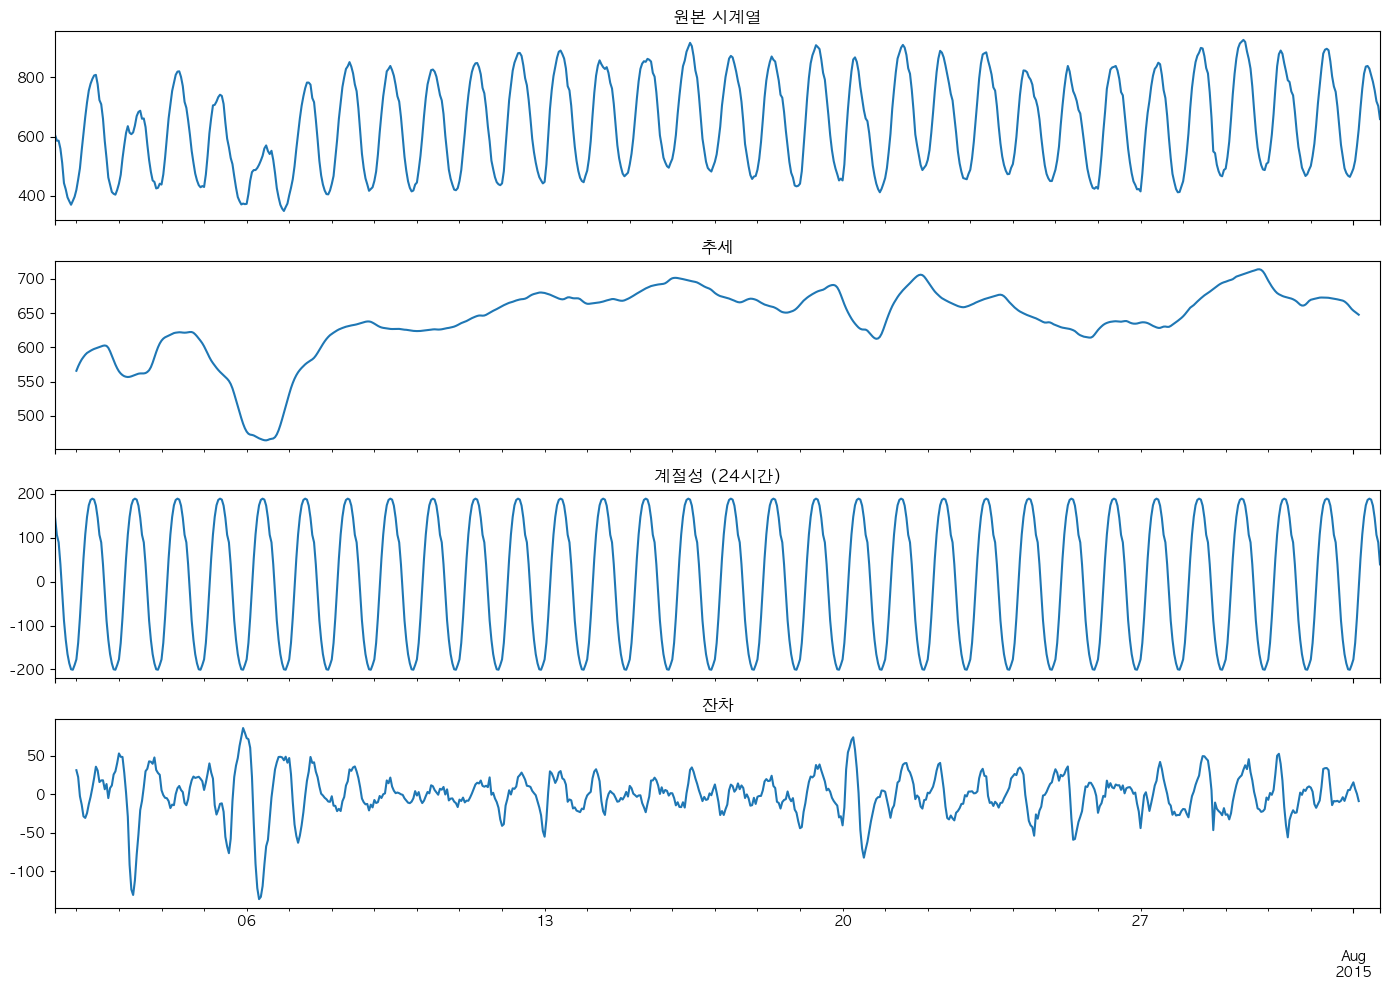

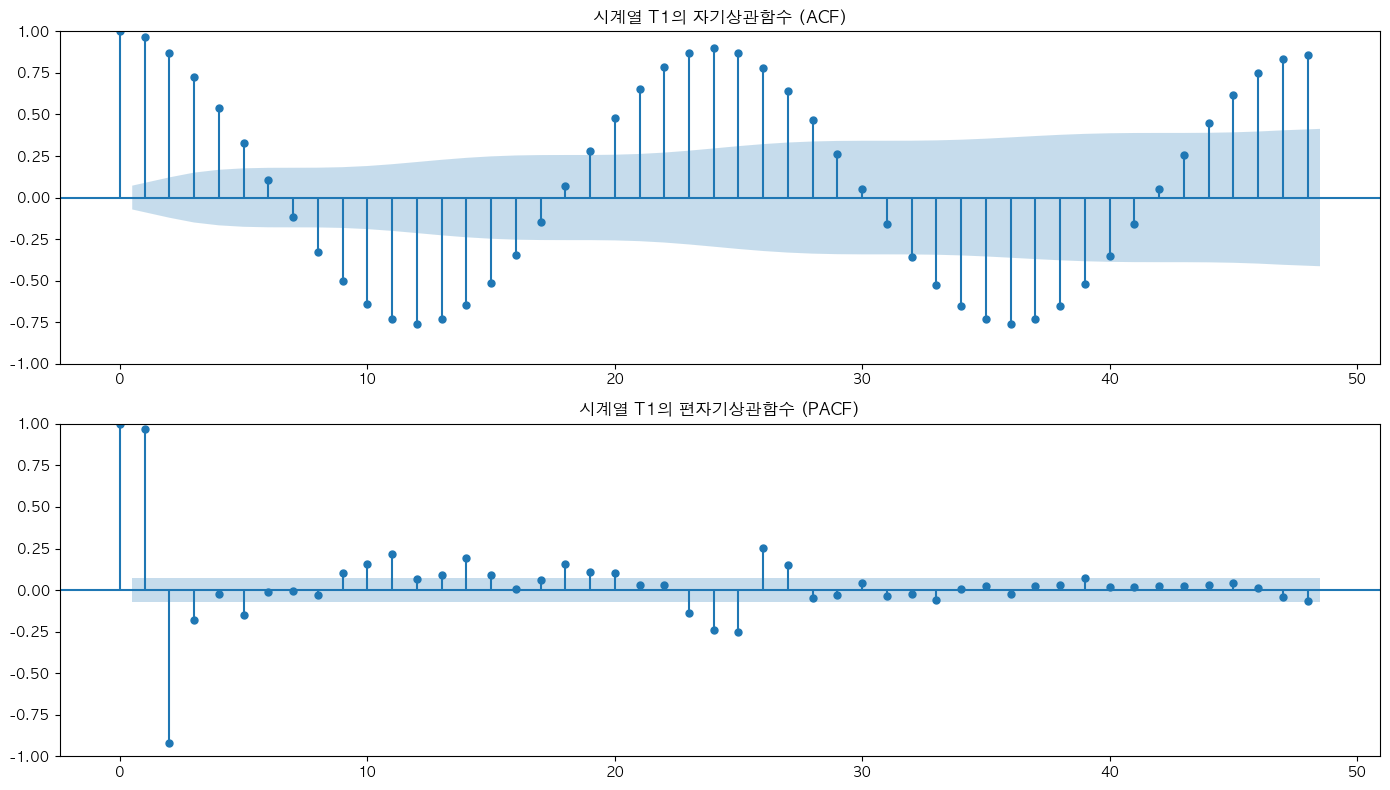


ADF 정상성 검정 결과:
ADF 통계량: -2.24168156314086
p-value: 0.1914665988731925
임계값:
	1%: -3.4393644334758475
	5%: -2.8655182850048306
	10%: -2.568888486973192
결론: 시계열이 비정상적입니다 (귀무가설 기각 실패)


In [55]:
def analyze_time_series_properties(time_series_dict, sample_id=None):
    """
    시계열의 속성(ACF, PACF, 계절성 분해)을 분석합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    
    # pandas Series로 변환
    date_range = pd.date_range(start=start_time, periods=len(values), freq='h')
    ts_series = pd.Series(values, index=date_range)
    
    # 1. 계절성 분해
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # 24시간(일별) 주기로 분해
    try:
        decomposition = seasonal_decompose(ts_series, model='additive', period=24)
        
        fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
        decomposition.observed.plot(ax=axes[0], title='원본 시계열')
        decomposition.trend.plot(ax=axes[1], title='추세')
        decomposition.seasonal.plot(ax=axes[2], title='계절성 (24시간)')
        decomposition.resid.plot(ax=axes[3], title='잔차')
        
        plt.tight_layout()
        plt.show()
    except:
        print("계절성 분해 실패 - 시계열 길이나 결측값 문제일 수 있습니다.")
    
    # 2. ACF 및 PACF 분석
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))
    
    try:
        plot_acf(ts_series.dropna(), lags=48, ax=axes[0])  # 48시간(2일) 지연까지
        axes[0].set_title(f'시계열 {sample_id}의 자기상관함수 (ACF)')
        
        plot_pacf(ts_series.dropna(), lags=48, ax=axes[1])
        axes[1].set_title(f'시계열 {sample_id}의 편자기상관함수 (PACF)')
        
        plt.tight_layout()
        plt.show()
    except:
        print("ACF/PACF 분석 실패 - 시계열 길이나 결측값 문제일 수 있습니다.")
    
    # 3. 정상성 검정
    from statsmodels.tsa.stattools import adfuller
    
    try:
        adf_result = adfuller(ts_series.dropna())
        print('\nADF 정상성 검정 결과:')
        print(f'ADF 통계량: {adf_result[0]}')
        print(f'p-value: {adf_result[1]}')
        print('임계값:')
        for key, value in adf_result[4].items():
            print(f'\t{key}: {value}')
        
        if adf_result[1] <= 0.05:
            print("결론: 시계열이 정상적입니다 (귀무가설 기각)")
        else:
            print("결론: 시계열이 비정상적입니다 (귀무가설 기각 실패)")
    except:
        print("ADF 검정 실패 - 시계열 길이나 결측값 문제일 수 있습니다.")

# 첫 번째 시계열의 속성 분석
analyze_time_series_properties(time_series_dict, first_ts_id)

실루엣 점수: 0.4004

군집별 시계열 수:
cluster
0    35
2    11
1     4
Name: count, dtype: int64

군집별 특성 평균:
          Cluster 0      Cluster 1     Cluster 2
mean    4081.474408   96537.668783  34017.527346
std      822.235742   17024.092791   6309.555287
median  4068.242857   95566.125000  33802.454545
min     2591.485714   62693.250000  22391.272727
max     5921.657143  134621.000000  47416.000000
range   3330.171429   71927.750000  25024.727273
cv         0.201128       0.176204      0.186347
acf_1      0.964746       0.973511      0.968741
acf_24     0.915414       0.926478      0.936695


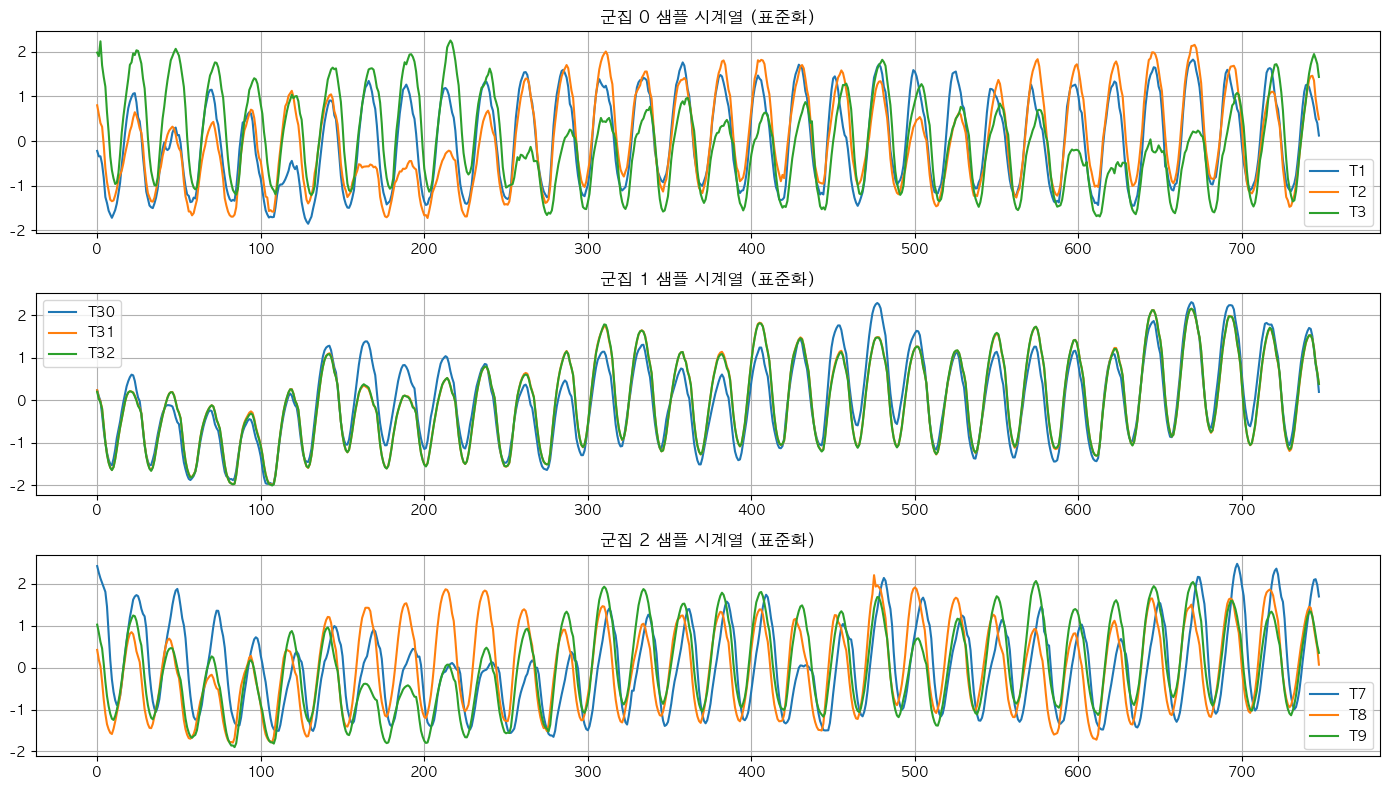

In [56]:
def cluster_time_series(time_series_dict, n_clusters=3, max_samples=100):
    """
    시계열 데이터를 군집화합니다.
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    
    # 특성 추출을 위한 시계열 선택 (최대 max_samples개)
    sample_ids = list(time_series_dict.keys())[:max_samples]
    
    # 각 시계열에서 특성 추출
    features = []
    for ts_id in sample_ids:
        _, values = time_series_dict[ts_id]
        values_np = np.array(values)
        
        # 결측값 제외
        values_clean = values_np[~np.isnan(values_np)]
        
        if len(values_clean) > 0:
            # 기본 통계 특성
            feature = {
                'ts_id': ts_id,
                'mean': np.mean(values_clean),
                'std': np.std(values_clean),
                'median': np.median(values_clean),
                'min': np.min(values_clean),
                'max': np.max(values_clean),
                'range': np.max(values_clean) - np.min(values_clean),
                'cv': np.std(values_clean) / np.mean(values_clean) if np.mean(values_clean) != 0 else 0
            }
            
            # 추가 특성: 자기상관 (시차 1, 24)
            if len(values_clean) > 24:
                acf_1 = np.corrcoef(values_clean[:-1], values_clean[1:])[0, 1]
                acf_24 = np.corrcoef(values_clean[:-24], values_clean[24:])[0, 1]
                feature['acf_1'] = acf_1
                feature['acf_24'] = acf_24
            else:
                feature['acf_1'] = 0
                feature['acf_24'] = 0
            
            features.append(feature)
    
    # DataFrame 생성
    feature_df = pd.DataFrame(features)
    ts_ids = feature_df['ts_id']
    feature_df = feature_df.drop(columns=['ts_id'])
    
    # 특성 스케일링
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(feature_df)
    
    # KMeans 군집화
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    
    # 결과 DataFrame 생성
    cluster_df = pd.DataFrame({
        'ts_id': ts_ids,
        'cluster': clusters
    })
    
    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(features_scaled, clusters)
    print(f"실루엣 점수: {silhouette_avg:.4f}")
    
    # 군집별 크기
    print("\n군집별 시계열 수:")
    print(cluster_df['cluster'].value_counts())
    
    # 군집별 특성 평균
    cluster_means = pd.DataFrame()
    for i in range(n_clusters):
        cluster_indices = cluster_df[cluster_df['cluster'] == i].index
        cluster_means[f'Cluster {i}'] = feature_df.iloc[cluster_indices].mean()
    
    print("\n군집별 특성 평균:")
    print(cluster_means)
    
    # 군집별 샘플 시계열 시각화
    plt.figure(figsize=(14, 8))
    
    for cluster_id in range(n_clusters):
        plt.subplot(n_clusters, 1, cluster_id+1)
        
        # 해당 군집의 시계열 ID 추출
        cluster_ts_ids = cluster_df[cluster_df['cluster'] == cluster_id]['ts_id'].values
        
        # 최대 3개까지만 표시
        for i, ts_id in enumerate(cluster_ts_ids[:3]):
            _, values = time_series_dict[ts_id]
            
            # 표준화
            values_np = np.array(values)
            values_mean = np.mean(values_np)
            values_std = np.std(values_np)
            values_standardized = (values_np - values_mean) / values_std
            
            plt.plot(values_standardized, label=f'{ts_id}')
        
        plt.title(f'군집 {cluster_id} 샘플 시계열 (표준화)')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return cluster_df

# 시계열 군집화 (최대 50개 샘플 사용)
cluster_results = cluster_time_series(time_series_dict, n_clusters=3, max_samples=50)

### 인사이트:

1. 스케일에 따른 분류: 가장 명확한 구분 기준은 데이터의 스케일(평균값)입니다. 군집 0은 낮은 값, 군집 2는 중간 값, 군집 1은 높은 값의 시계열로 구성되어 있습니다.
2. 변동성 차이:

    군집 0: 상대적으로 높은 변동성(CV=0.201)  
    군집 1: 낮은 변동성(CV=0.176)  
    군집 2: 중간 수준의 변동성(CV=0.186)  


### 시간 패턴:

모든 군집이 높은 자기상관계수를 보이지만, 군집 2가 일별 패턴(ACF(24))이 가장 강합니다.
군집 1은 연속된 시점 간의 상관관계(ACF(1))가 가장 높습니다.



### 실제 적용 가능한 해석:

군집 0 (낮은 값, 높은 변동성):

소규모 상점의 방문객 수나 가정용 전력 소비와 같이 규모는 작지만 변동성이 큰 시계열
총 35개로 가장 일반적인 패턴을 나타냄


군집 1 (높은 값, 낮은 변동성):

대형 쇼핑몰이나 공공시설의 이용량과 같이 규모가 크고 안정적인 패턴을 보이는 시계열
총 4개로 희소한 특별 케이스를 나타냄


군집 2 (중간 값, 강한 일별 패턴):

중간 규모의 상업시설이나 업무 공간의 사용량처럼 뚜렷한 일간 패턴을 가진 시계열
총 11개로 중간 빈도의 패턴을 나타냄

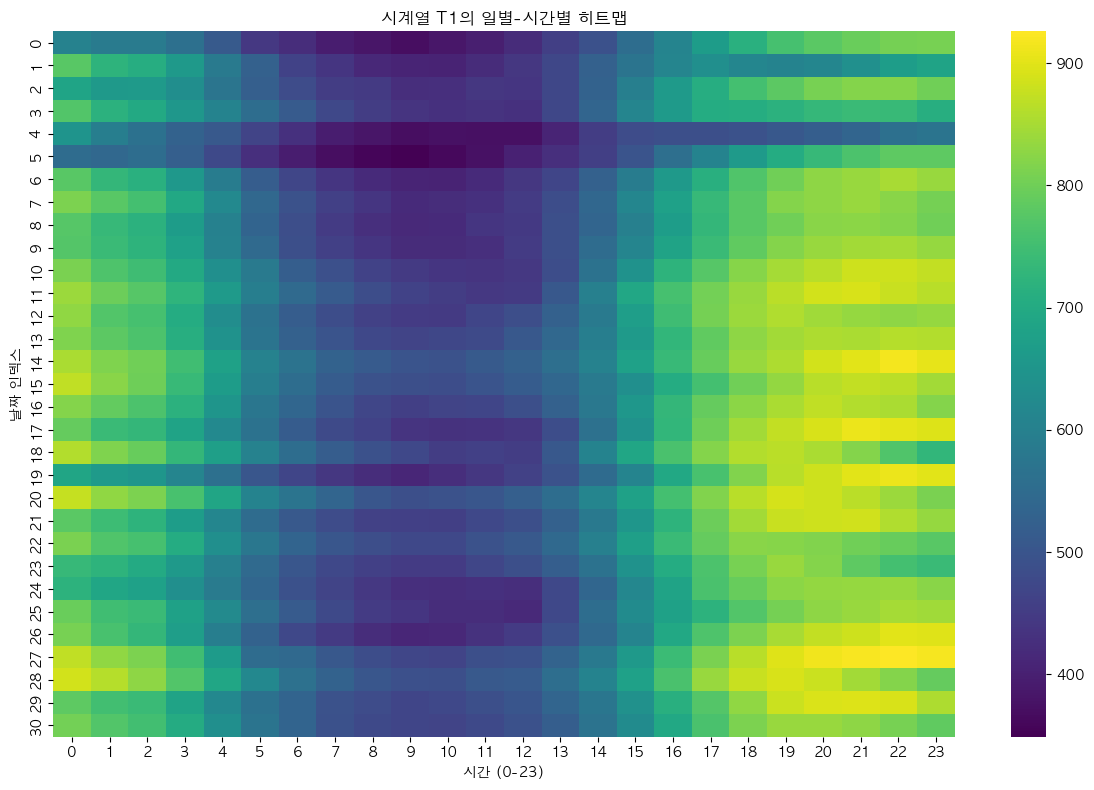

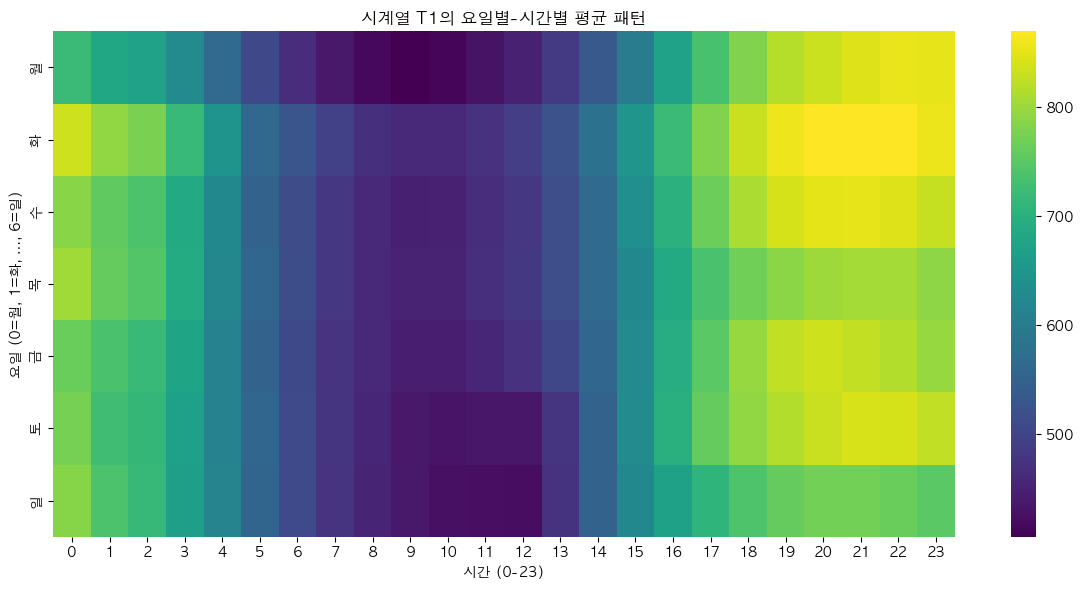

In [57]:
def visualize_heatmap(time_series_dict, sample_id=None):
    """
    시간대별 패턴을 히트맵으로 시각화합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # 일별 패턴 분석 (24시간)
    if len(values_np) >= 24:
        days = len(values_np) // 24
        daily_data = values_np[:days * 24].reshape(days, 24)
        
        plt.figure(figsize=(12, 8))
        
        # 히트맵
        sns.heatmap(daily_data, cmap='viridis')
        plt.title(f'시계열 {sample_id}의 일별-시간별 히트맵')
        plt.xlabel('시간 (0-23)')
        plt.ylabel('날짜 인덱스')
        plt.tight_layout()
        plt.show()
        
        # 요일별-시간별 패턴 (7일 주기가 있다고 가정)
        if days >= 7:
            # 첫 번째 날짜의 요일 확인
            start_weekday = start_time.weekday()  # 0=월요일, 1=화요일, ...
            
            # 모든 날짜의 요일 계산
            weekdays = [(start_weekday + i) % 7 for i in range(days)]
            
            # 요일별 데이터 그룹화
            weekday_data = {i: [] for i in range(7)}
            for day_idx, weekday in enumerate(weekdays):
                weekday_data[weekday].append(daily_data[day_idx])
            
            # 각 요일의 평균 패턴
            weekday_means = np.zeros((7, 24))
            for weekday, data in weekday_data.items():
                if data:  # 비어있지 않은 경우
                    weekday_means[weekday] = np.mean(data, axis=0)
            
            plt.figure(figsize=(12, 6))
            sns.heatmap(weekday_means, cmap='viridis')
            plt.title(f'시계열 {sample_id}의 요일별-시간별 평균 패턴')
            plt.xlabel('시간 (0-23)')
            plt.ylabel('요일 (0=월, 1=화, ..., 6=일)')
            plt.yticks(np.arange(7) + 0.5, ['월', '화', '수', '목', '금', '토', '일'])
            plt.tight_layout()
            plt.show()

# 히트맵 시각화
visualize_heatmap(time_series_dict, first_ts_id)